In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Test input

In [2]:
data = pd.read_csv("summaryAllprotInf.csv",
                  sep=',')

In [3]:
data

,uniprot,proteinName,Group,status,Column,meanAbu,log10meanAbu,stdDev,relStdDev,Rank,conc_thpa_ugl,mars14,sepromix20,organism,fastaSequence,pI,chargeAtpH8,molecularWeight,aromaticity,hydrophobicity
0,P02768,Albumin,Healthy,native,1,8.710644e+08,8.940050,2.410850e+08,0.276771,1.0,3.540000e+07,1,1,"<name type=""""common"""">Human</name>",MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,5.916962,-15.702890,69365.9604,0.091954,-0.353859
1,P02768,Albumin,Healthy,native,2,8.710644e+08,8.940050,2.410850e+08,0.276771,1.0,3.540000e+07,1,1,"<name type=""""common"""">Human</name>",MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,5.916962,-15.702890,69365.9604,0.091954,-0.353859
2,P02768,Albumin,Lung Cancer 1 Adeno,native,1,7.547525e+08,8.877805,2.433817e+08,0.322466,1.0,3.540000e+07,1,1,"<name type=""""common"""">Human</name>",MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,5.916962,-15.702890,69365.9604,0.091954,-0.353859
3,P02768,Albumin,Lung Cancer 1 Adeno,native,2,7.547525e+08,8.877805,2.433817e+08,0.322466,1.0,3.540000e+07,1,1,"<name type=""""common"""">Human</name>",MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,5.916962,-15.702890,69365.9604,0.091954,-0.353859
4,P02768,Albumin,Lung Cancer 2 Squamous,native,1,7.251390e+08,8.860421,1.537690e+08,0.212055,1.0,3.540000e+07,1,1,"<name type=""""common"""">Human</name>",MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,5.916962,-15.702890,69365.9604,0.091954,-0.353859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,Q13444,Disintegrin and metalloproteinase domain-conta...,Healthy,depleted,1,4.055529e+03,3.608048,1.273453e+03,0.314004,1792.0,NaN,0,0,"<name type=""""common"""">Human</name>",MRLALLWALGLLGAGSPLPSWPLPNIGGTEEQQAESEKAPREPLEP...,6.296703,-13.332306,92958.2944,0.046350,-0.263847
20116,Q13444,Disintegrin and metalloproteinase domain-conta...,Healthy,depleted,2,4.488230e+03,3.652075,1.291897e+03,0.287841,1792.0,NaN,0,0,"<name type=""""common"""">Human</name>",MRLALLWALGLLGAGSPLPSWPLPNIGGTEEQQAESEKAPREPLEP...,6.296703,-13.332306,92958.2944,0.046350,-0.263847
20117,Q15008,26S proteasome non-ATPase regulatory subunit 6,Prostate Cancer,depleted,1,5.211390e+03,3.716954,1.818763e+03,0.348998,1792.0,8.600000e-03,0,0,"<name type=""""common"""">Human</name>",MPLENLEEEGLPKNPDLRIAQLRFLLSLPEHRGDAAVRDELMAAVR...,5.451053,-10.771536,45530.8067,0.105398,-0.355527
20118,Q6UWH4,Golgi-associated kinase 1B,Lung Cancer 1 Adeno,depleted,1,5.968579e+03,3.775871,3.490902e+03,0.584880,1792.0,NaN,0,0,"<name type=""""common"""">Human</name>",MTCPDKPGQLINWFICSLCVPRVRKLWSSRRPRTRRNLLLGTACAI...,9.751762,23.670905,57551.5086,0.063584,-0.393834


In [4]:
print('Total rows in the dataset:  \n',data.count())
for name in data.columns:
    if len(data[name].unique()) < 5:
        print(name ,
          '\n',
          ' Labels: ',
          data[name].unique(),
          ' Unique labels: ',
          len(data[name].unique()))
    else:
                print(name ,
          '\n',
          ' Unique labels: ',
          len(data[name].unique()))

Total rows in the dataset:  
 uniprot            20120
proteinName        20120
Group              20120
status             20120
Column             20120
meanAbu            20120
log10meanAbu       20120
stdDev             20120
relStdDev          20120
Rank               20120
conc_thpa_ugl      13096
mars14             20120
sepromix20         20120
organism           18544
fastaSequence      18544
pI                 18544
chargeAtpH8        18544
molecularWeight    18544
aromaticity        18544
hydrophobicity     18544
dtype: int64
uniprot 
  Unique labels:  1893
proteinName 
  Unique labels:  1893
Group 
  Labels:  ['Healthy' 'Lung Cancer 1 Adeno' 'Lung Cancer 2 Squamous'
 'Prostate Cancer']  Unique labels:  4
status 
  Labels:  ['native' 'depleted']  Unique labels:  2
Column 
  Labels:  [1 2]  Unique labels:  2
meanAbu 
  Unique labels:  16316
log10meanAbu 
  Unique labels:  16316
stdDev 
  Unique labels:  16316
relStdDev 
  Unique labels:  16316
Rank 
  Unique labels:  2147
con

### We want to check if our dataset has balanced data

In [5]:
def countplot(columnname):
    datanew = data[columnname].astype('category')
    datanew.value_counts().plot(kind='bar') # Equal set size for both columns used

In [6]:
data['Column'] = data['Column'].astype('category')

<AxesSubplot:>

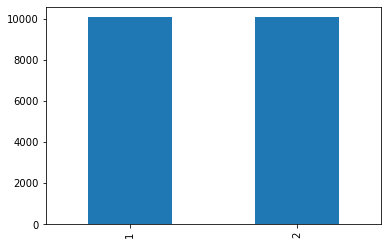

In [7]:
data.Column.value_counts().plot(kind='bar') # Equal set size for both columns used

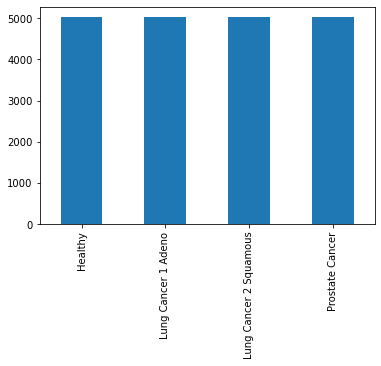

In [8]:
countplot('Group')

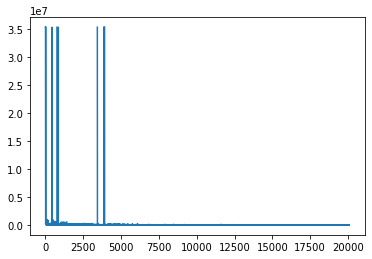

In [9]:
plt.plot(data['conc_thpa_ugl'])

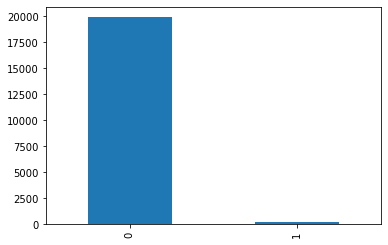

In [10]:
countplot('mars14') # Type of a protein extraction column

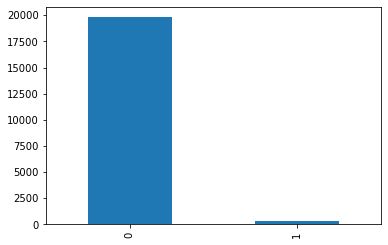

In [78]:
countplot('sepromix20')

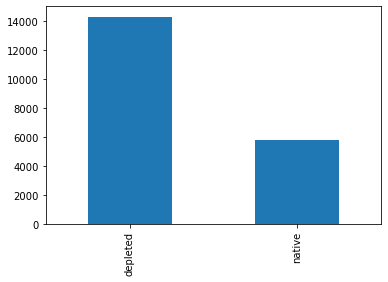

In [11]:
countplot('status')

In [12]:
data['proteinName'] = data['proteinName'].astype('category')

<AxesSubplot:ylabel='Frequency'>

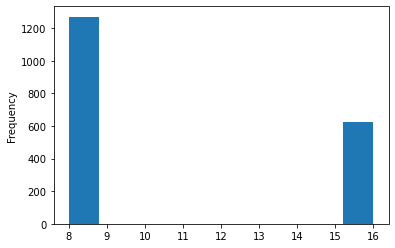

In [68]:
data['proteinName'].value_counts().plot(kind='hist')

In [56]:
new = data.iloc[:, 1:3].groupby(['proteinName', 'Group']).size()

In [57]:
new[:30]

proteinName                                                       Group                 
(E3-independent) E2 ubiquitin-conjugating enzyme                  Healthy                   2
                                                                  Lung Cancer 1 Adeno       2
                                                                  Lung Cancer 2 Squamous    2
                                                                  Prostate Cancer           2
1,4-alpha-glucan-branching enzyme                                 Healthy                   2
                                                                  Lung Cancer 1 Adeno       2
                                                                  Lung Cancer 2 Squamous    2
                                                                  Prostate Cancer           2
1-phosphatidylinositol 4,5-bisphosphate phosphodiesterase beta-2  Healthy                   2
                                                                 

In [61]:
data.Group.value_counts()

Healthy                   5030
Lung Cancer 1 Adeno       5030
Lung Cancer 2 Squamous    5030
Prostate Cancer           5030
Name: Group, dtype: int64

In [63]:
data.proteinName.count()

20120

In [65]:
new.groupby('Group').value_counts()

Group                    
Healthy                 2    1271
                        4     622
Lung Cancer 1 Adeno     2    1271
                        4     622
Lung Cancer 2 Squamous  2    1271
                        4     622
Prostate Cancer         2    1271
                        4     622
dtype: int64

In [66]:
# 622 Proteins have 4 samples per Group, 1271 Proteins have 2 samples per Group

([<matplotlib.axis.YTick at 0x131d72520>,
 [Text(0, 0, 'uniprot'),
  Text(0, 1, 'proteinName'),
  Text(0, 2, 'Group'),
  Text(0, 3, 'status'),
  Text(0, 4, 'Column'),
  Text(0, 5, 'meanAbu'),
  Text(0, 6, 'log10meanAbu'),
  Text(0, 7, 'stdDev'),
  Text(0, 8, 'relStdDev'),
  Text(0, 9, 'Rank'),
  Text(0, 10, 'conc_thpa_ugl'),
  Text(0, 11, 'mars14'),
  Text(0, 12, 'sepromix20'),
  Text(0, 13, 'organism'),
  Text(0, 14, 'fastaSequence'),
  Text(0, 15, 'pI'),
  Text(0, 16, 'chargeAtpH8'),
  Text(0, 17, 'molecularWeight'),
  Text(0, 18, 'aromaticity'),
  Text(0, 19, 'hydrophobicity')])

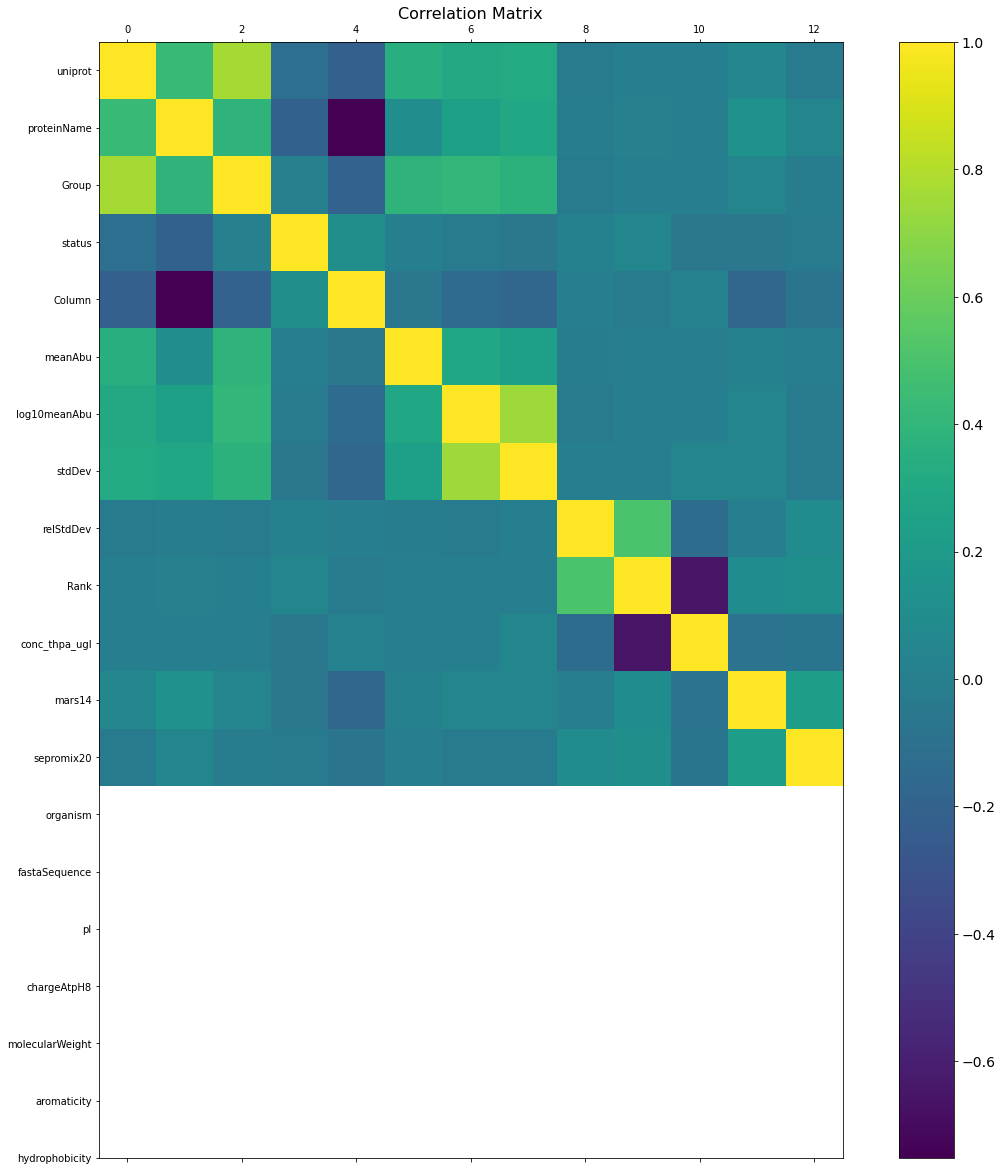

In [80]:
f = plt.figure(figsize=(20,20))
plt.matshow(data.corr(), fignum= f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)


<AxesSubplot:>

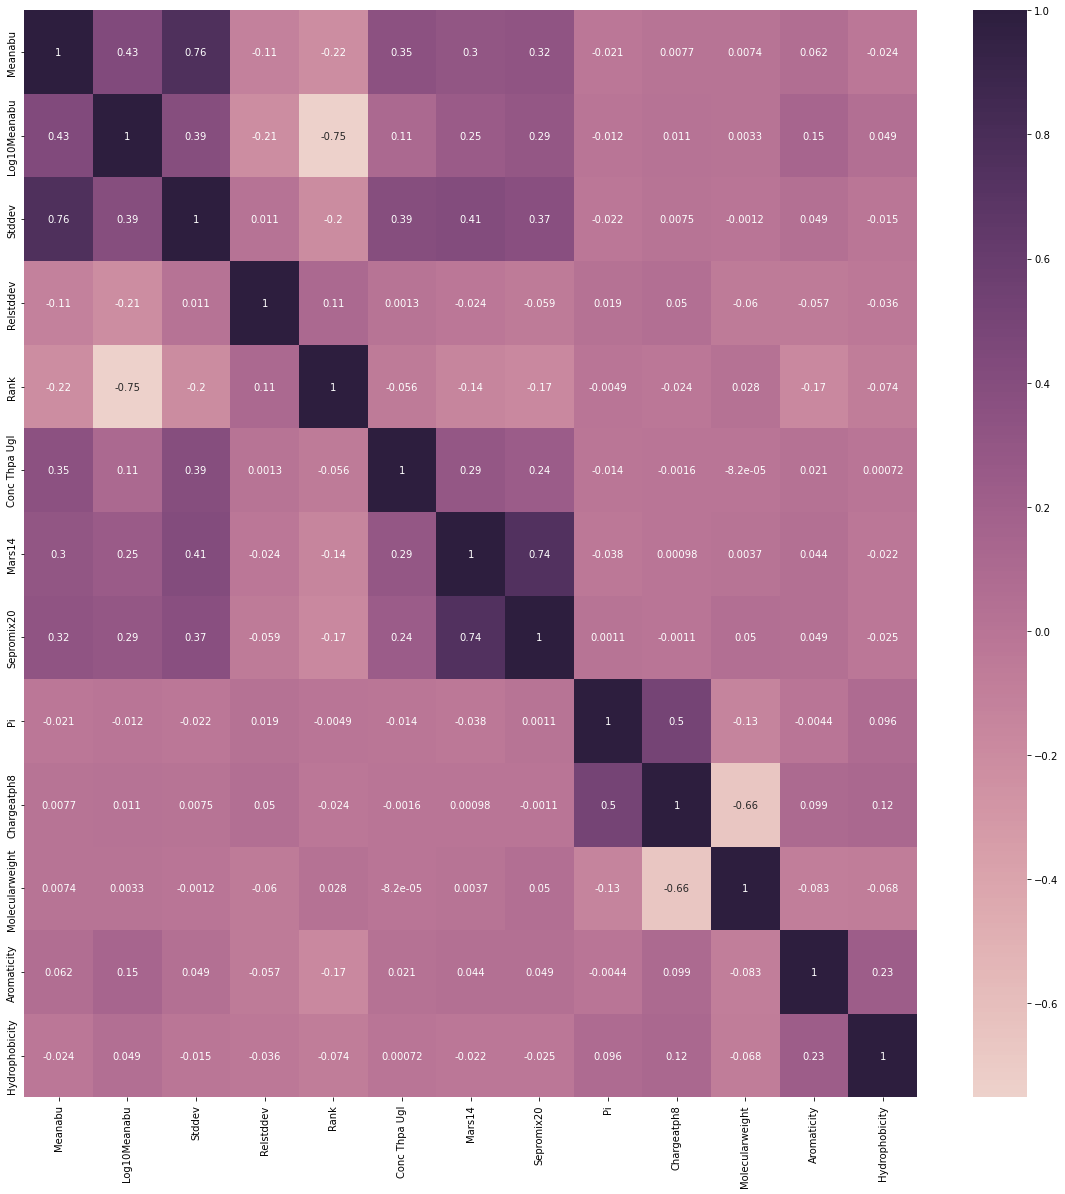

In [86]:
import seaborn as sns

h_labels = [x.replace('_', ' ').title() for x in 
            list(data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=h_labels, yticklabels=h_labels,
            ax=ax)